In [13]:
from Bio import SeqIO
import numpy as np
import allel
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
### Read in GFF
f = open('../covid19_population_genomics/reference_genome/reference.gff')
genes = {}
for line in f.readlines():
    if not line.startswith("#"):
        if line.split("\t")[2] == 'CDS':
            gene = line.split(";product=")[1].split(";")[0]
            start = int(line.split("\t")[3])
            stop = int(line.split("\t")[4])
            genes[gene] = {"start": start, "stop": stop}

### Create alignment to GFF index
ref = 'MN908947'
seqs = []

for record in SeqIO.parse('../covid19_population_genomics/interpatient/mar20_filtered.aln', 'fasta'):
    if record.id == ref:
        ref_record = record
    seqs.append(str(record.seq).upper())

align_index = {}
true_pos = 1
align_pos = 1
for pos in ref_record:
    if pos != '-':
        align_index[align_pos] = true_pos
        true_pos += 1
    else:
        align_index[align_pos] = np.nan
    align_pos += 1

In [15]:
## Create scikit-alllel object

P2C = {'A':0, 'C':1, 'T':2, 'G':3}
C2P = {0:'A', 1:'C', 2:'T', 3:'G'}

allele_counts = []
align_pos = 1
for pos in ref_record:
    alleles = [0,0,0,0]
    if not np.isnan(align_index[align_pos]):
        for seq in seqs:
            if seq[align_pos-1] in P2C:
                alleles[P2C[seq[align_pos-1]]] += 1


        allele_counts.append(alleles)
    align_pos += 1
allel1 = allel.AlleleCountsArray(allele_counts)

In [6]:
## calculate pi at every position
positions = [x for x in range(1, len(allel1)+1)]
nuc_div = allel.windowed_diversity(positions, allel1, start=1, size=1, step=1)

In [7]:
f = open('../covid19_population_genomics/interpatient/nucleotide_diversity.txt', 'w+')
i = 1
for pi in nuc_div[0]:
    f.write(str(i) + "\t" + str(pi) + "\n")
    i += 1
f.close()

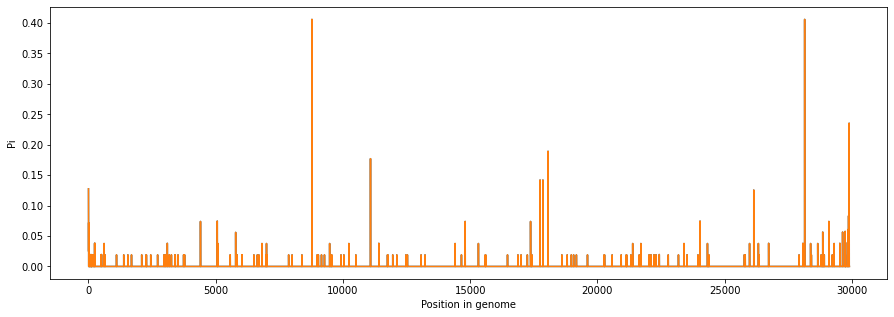

In [8]:
plt.figure(figsize=(15,5))
plt.plot(nuc_div[1], nuc_div[0])
# plt.savefig("out.png")
plt.ylabel("Pi")
plt.xlabel("Position in genome")
plt.show()

In [9]:
## calculate pi for each gene

gene_names = []
genes_pi = []
for g in genes:
    nuc_div = allel.sequence_diversity(range(genes[g]['start'], genes[g]['stop']+1), allel1)
    gene_names.append(g)
    genes_pi.append(nuc_div)

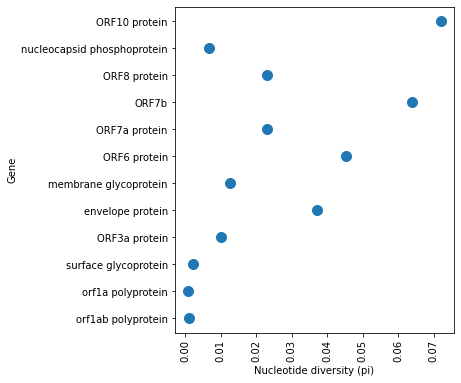

In [30]:
plt.figure(figsize=(5,6))
plt.scatter(genes_pi, gene_names, s=100)
# plt.savefig("out.png")

# plt.stem(gene_names, genes_pi)
plt.ylabel("Gene")
plt.xlabel("Nucleotide diversity (pi)")
plt.xticks(rotation=90)
plt.show()

In [32]:
## calculate pi for each protein product
protein_products = pd.read_table('../covid19_population_genomics/reference_genome/COVID_genes_table_v3.tsv', sep="\t")
gene_names = []
genes_pi = []

for index, p in protein_products.iterrows():
    nuc_div = allel.sequence_diversity(range(p['start'], p['end']+1), allel1)
    gene_names.append(p['name'])
    genes_pi.append(nuc_div)

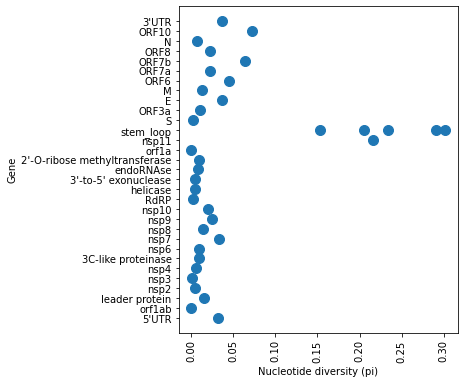

In [33]:
plt.figure(figsize=(5,6))
plt.scatter(genes_pi, gene_names, s=100)
# plt.savefig("out.png")

# plt.stem(gene_names, genes_pi)
plt.ylabel("Gene")
plt.xlabel("Nucleotide diversity (pi)")
plt.xticks(rotation=90)
plt.show()

In [34]:
protein_products

,Unnamed: 0,gene,name,scaffold,direction,translated,start,end,location,stop
0,0,5'UTR,5'UTR,NC_045512.2,1,False,1,265,[0:265](+),266
1,1,orf1ab,orf1ab,NC_045512.2,1,True,266,21555,"join{[265:13468](+), [13467:21555](+)}",21556
2,2,YP_009725297.1,leader protein,NC_045512.2,1,True,266,805,[265:805](+),806
3,3,YP_009725298.1,nsp2,NC_045512.2,1,True,806,2719,[805:2719](+),2720
4,4,YP_009725299.1,nsp3,NC_045512.2,1,True,2720,8554,[2719:8554](+),8555
5,5,YP_009725300.1,nsp4,NC_045512.2,1,True,8555,10054,[8554:10054](+),10055
6,6,YP_009725301.1,3C-like proteinase,NC_045512.2,1,True,10055,10972,[10054:10972](+),10973
7,7,YP_009725302.1,nsp6,NC_045512.2,1,True,10973,11842,[10972:11842](+),11843
8,8,YP_009725303.1,nsp7,NC_045512.2,1,True,11843,12091,[11842:12091](+),12092
9,9,YP_009725304.1,nsp8,NC_045512.2,1,True,12092,12685,[12091:12685](+),12686
